<a href="https://colab.research.google.com/github/dgmyaing/visualization/blob/main/Visualization_Q4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#1. I chose to use a data set titled Opioid Treatment Program Providers. This set explores different opiod treatment providers
#2. It doesn't document how missing information is handled from my understanding. I think the data dictionary itself is well organized, and I feel like I have a
#   understanding of the variables from it.
#3. Because there are not a ton of quantitative variables that are easily comparable, I'm going to look into the distribution of facilities amonst different states
#4. I made a boxplot for Medicare ID Effective Date, which indicated that many outlier dates existed in earlier time periods.
#5. The histogram shows the amount of cities with facilites
#6. The Scatterplot displays similar data, using states as a base and provider names to see if there was any correlation between state a provider locations
# This dataset wasn't the most amazing to work with regarding quantitative variables, and I had trouble cleaning the data, especially when it came to formatting tables
# for readability




In [31]:
scc = pd.read_csv('https://raw.githubusercontent.com/dgmyaing/visualization/refs/heads/main/OPIOID_TREATMENT_PROGRAM_PROVIDERS_09302024.csv')
scc.head()

,NPI,PROVIDER NAME,ADDRESS LINE 1,ADDRESS LINE 2,CITY,STATE,ZIP,MEDICARE ID EFFECTIVE DATE,PHONE
0,1003008301,"CENTER FOR COMMUNITY ALTERNATIVES,",25 CHAPEL ST,STE 701,BROOKLYN,NY,11201-1917,5/1/2024,7188589658
1,1003081399 1013055110,BAART BEHAVIORAL HEALTH SERVICES IN,617 COMSTOCK RD,STE 5,BERLIN,VT,05602-8498,1/1/2020,8022232003
2,1003150004,AMS OF WISCONSIN LLC,9532 E 16 FRONTAGE RD,STE 100,ONALASKA,WI,54650-6742,1/1/2020,9202322332
3,1003362484,BHG XLII LLC,5715 PRINCESS ANNE RD,NaN,VIRGINIA BEACH,VA,23462-3222,1/1/2020,7579620748
4,1003368945,RTS EDGEWOOD,2205 PULASKI HIGHWAY,NaN,EDGEWOOD,MD,21040,10/13/2020,4434569001


In [36]:
PN = 'PROVIDER NAME'
local = scc[PN] # I just wanted to get a sense of the variable, especially how varied it is
print(local.describe(), '\n')
print( local.unique() , '\n')
print(local.value_counts())

count               1517
unique               883
top       BRIGHTVIEW LLC
freq                  33
Name: PROVIDER NAME, dtype: object 

['CENTER FOR COMMUNITY ALTERNATIVES,'
 'BAART BEHAVIORAL HEALTH SERVICES IN' 'AMS OF WISCONSIN LLC'
 'BHG XLII LLC' 'RTS EDGEWOOD' 'METRO TREATMENT OF FLORIDA LP'
 'PREMIER CARE OF OHIO, LLC' 'AFFINITY HEALTHCARE GROUP CHERRY HI'
 'TARZANA TREATMENT CENTERS, INC.' 'WEST TEXAS COUNSELING & REHABILITAT'
 'ALLIANCE RECOVERY CENTER' 'WESTERN PACIFIC MED-CORP'
 'SOUTHEASTERN COUNCIL ON ALCOHOLISM' 'RICHMOND TREATMENT CENTER LLC'
 'AEGIS TREATMENT CENTERS LLC' 'WCHS INC' 'EAST INDIANA LLC'
 'DISCOVERY HOUSE BC LLC' 'MONTEFIORE MOUNT VERNON HOSPITAL'
 'COMPREHENSIVE BEHAVIORAL HEALTH INC' 'DENVER RECOVERY GROUP LLC'
 'INTEGRATED CARE CLINICIANS LLC' 'COMMUNITY MEDICAL SERVICES'
 'COMMUNITY MEDICAL SERVICES ARIZONA-'
 'ADDICTION SERVICES AND PHARMACOTHER' 'METROPOLITAN HOSPITAL CENTER'
 'CASA-TRINITY INC' 'HABIT OPCO, LLC' 'METRO EAST DRUG TREATMENT'
 'COPE C

In [50]:
print(scc['PROVIDER NAME'].describe(), '\n')
print(scc['PROVIDER NAME'].value_counts())
#Wanted to see the breakdown of how many providers are out there

count               1517
unique               883
top       BRIGHTVIEW LLC
freq                  33
Name: PROVIDER NAME, dtype: object 

PROVIDER NAME
BRIGHTVIEW LLC                         33
AEGIS TREATMENT CENTERS LLC            32
HABIT OPCO, LLC                        18
ADDICTION RESEARCH AND TREATMENT IN    17
METRO TREATMENT OF FLORIDA, LP         16
                                       ..
INSTITUTE OF SUPPORTIVE SERVICES IN     1
CHESAPEAKE TREATMENT SERVICES LLC       1
WILSON PROFESSIONAL SERVICES TREATM     1
PINNACLE TREATMENT CENTERS PA-VII       1
ATS AT JHBMC MFL BLDG                   1
Name: count, Length: 883, dtype: int64


In [42]:
print(scc['ZIP'].describe(), '\n')
print(scc['ZIP'].value_counts())
#Getting a feal for ZIP distribution; trying to see if there are any variables that are easily quantifiable

count           1517
unique          1474
top       27530-4097
freq               4
Name: ZIP, dtype: object 

ZIP
27530-4097    4
21223-2134    3
10035-0776    3
78239-1975    2
11213-1122    2
             ..
63042-2821    1
76504-7033    1
54403-5543    1
58201-6509    1
21224-2734    1
Name: count, Length: 1474, dtype: int64


<Axes: ylabel='STATE'>

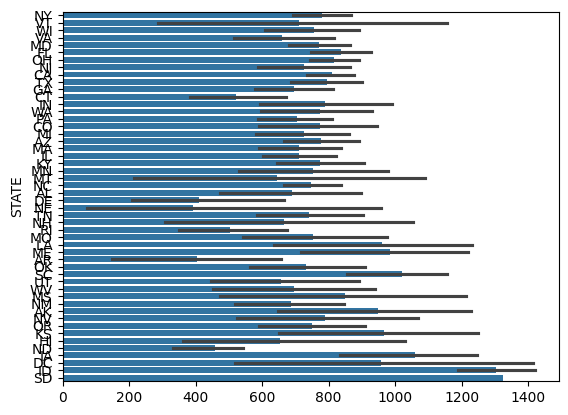

In [51]:
sns.barplot(data= scc['STATE'])
#Data came out a little messy, but good way to visualize amount of facilities per state

<Axes: xlabel='STATE', ylabel='Count'>

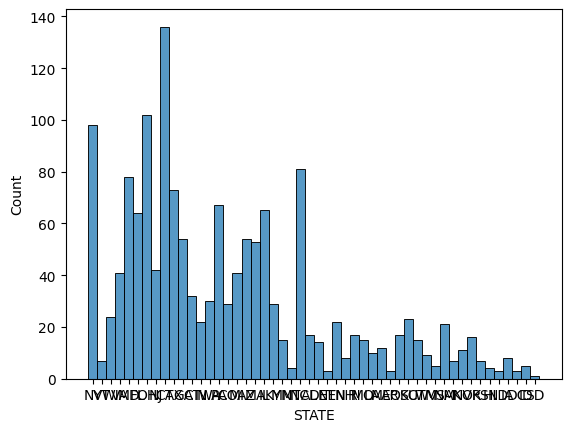

In [53]:
sns.histplot(data=scc, x=scc['STATE']) # this shows the exact same info as the bar graph but in a more easy to read form
#sry its a little messy lol

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='MEDICARE ID EFFECTIVE DATE'>

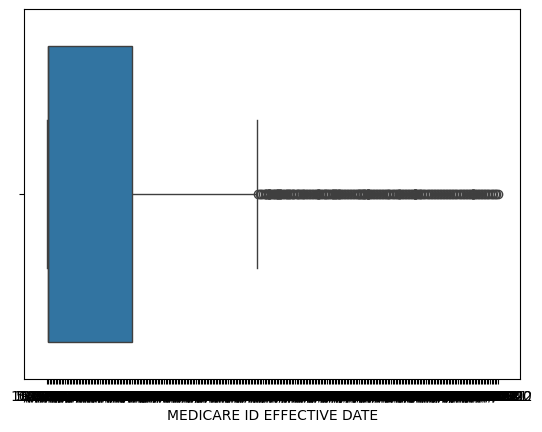

In [59]:
sns.boxplot(data=scc, x= 'MEDICARE ID EFFECTIVE DATE')
#I didn't really have a ton of data to do a boxplot with, so I used MEDICARE ID EFFECTIVE DATE even though I know this isn't a useful graph in any way
# I does show that many of the Medicare ID effective dates happen earlier rather than later.

<Axes: xlabel='STATE', ylabel='CITY'>

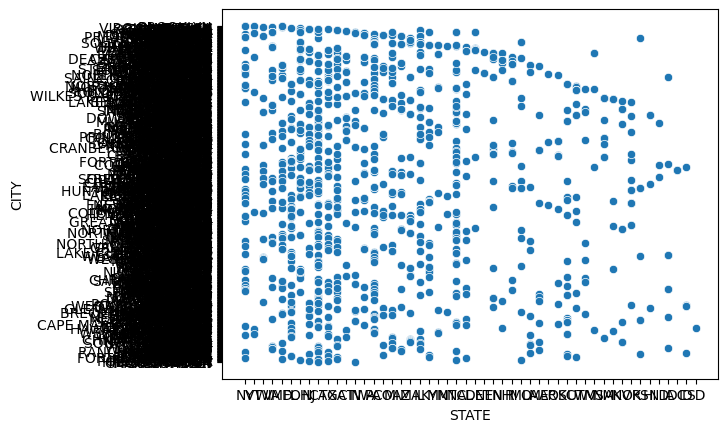

In [54]:
sns.scatterplot(data=scc, x= scc['STATE'], y=scc['CITY'])
#Kind of demonstrates the relationship between the amount of cities with centers in each state
#Still struggling with making the data more presentalble
# We can see many of the states on the lefthand side of the plot have more cities with Opiod treatment facilities than those on the right side

In [57]:
pd.crosstab(scc['STATE'], scc['PROVIDER NAME'])
#This is another example of the scatterplot above, and while not the best way to exemplify how many
#facilities are in each state.

PROVIDER NAME,A HELPING HAND,A.R.E.B.A. CASRIEL INC DBA ACI-ADDI,ABILENE ABSOLUTE RECOVERY SOLUTIONS,ABLE RECOVERY 1 LLC,ACADIA HEALTHCARE INC,ADAPT,ADDICTION MEDICAL FACILITY LLC,ADDICTION MEDICINE AND HEALTH ADVOC,ADDICTION RECOVERY INSTITUTE,ADDICTION RECOVERY INSTITUTE SOUTH,...,"WILLIAMSON TREATMENT CENTER, LLC","WILLIAMSPORT FAMILY MEDICAL CENTER,",WILSON PROFESSIONAL SERVICES TREATM,WINCHESTER COMPREHENSIVE TREATMENT,WINCHESTER HEALTH LLC,WMRS INC,"WOODSTOCK TREATMENT CENTER, LLC","WTCR ABILENE, INC.",ZENITH HOPE CENTER,ZEPF CENTER
STATE,,,,,,,,,,,,,,,,,,,,,
AK,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AL,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AR,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AZ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CO,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DC,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DE,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
